# Project 3 Fraud Detection Algorithm

## Load data and data split

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

data = pd.read_csv("0325_vars_final_zscale.csv", index_col = 0)

In [67]:
# Look at the data
data.head()

,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
Recnum,,,,,,,,,,,,,,,,,,,,,
818,0,-0.003287,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,7.346025,2.184037,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.474089,-0.414382,-0.077371,-0.721970
1403,0,0.915446,0.338513,0.263935,0.374613,-0.013802,0.529859,0.505899,-0.202011,2.184037,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,0.091413,0.229728,0.219330,-0.437000
1222,0,-0.081736,-0.232596,-0.180575,-0.262019,-0.031299,0.529859,0.505899,-0.202011,-0.573110,...,-0.305396,-0.107245,-0.148293,-0.207194,-0.204367,-0.185907,-0.421739,-0.354755,-0.101906,-0.617050
2169,0,-0.125585,-0.155362,-0.120462,-0.175923,-0.028772,0.529859,0.505899,-0.139801,2.184037,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.292151,-0.404932,-0.173845,-0.539719
2090,0,-0.411285,-0.343948,-0.267243,-0.386146,-0.046741,0.529859,0.505899,-0.139801,2.184037,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.507067,-0.451944,-0.241247,-0.674160


In [68]:
# test for NAN
pd.isnull(data).any()

Fraud                                 False
Actual/mean_Cardnum_30d               False
Actual/mean_Merchnum_14d              False
Actual/mean_Merchnum_30d              False
Actual/mean_Merchnum_7d               False
Actual/median_Merchnum_7d             False
Actual/sum_Cardnum_Merch zip_3d       False
Actual/sum_Cardnum_Merchnum_3d        False
Days_since_per_Cardnum                False
Days_since_per_Cardnum_Merch state    False
count_Cardnum_1d                      False
count_Cardnum_7d                      False
count_Cardnum_Merch state_3d          False
count_Cardnum_Merch state_7d          False
count_Cardnum_Merch zip_3d            False
count_Cardnum_Merchnum_3d             False
count_Cardnum_Merchnum_7d             False
mean_Cardnum_1d                       False
Actual/count_Cardnum_1d               False
Actual/count_Cardnum_30d              False
mean_Cardnum_30d                      False
dtype: bool

In [69]:
# split data into out of date(after 11/1/10), train and test
#oot_df = data.iloc[84300:,:]
#trte_df = data.iloc[:84299,:]

In [70]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [71]:
#oot_df.to_csv('oot.csv',index=True)
train.to_csv('train.csv',index=True)
test.to_csv('test.csv',index=True)

In [72]:
train.head()

,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
Recnum,,,,,,,,,,,,,,,,,,,,,
65692,0,-0.515356,0.252535,0.041959,-0.014424,0.141105,-0.349862,-0.397862,-0.222747,-0.580685,...,-0.051314,0.013019,-0.083686,0.033355,0.044402,-0.051431,-0.425295,-0.477997,-0.280689,-0.438790
23220,0,0.004730,-0.322369,-0.231213,-0.000786,-0.031299,0.529859,0.505899,-0.056856,-0.520088,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.469039,-0.408631,-0.218570,-0.715735
65844,0,-0.270497,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,-0.098329,2.184037,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,0.146445,0.292411,0.151928,0.989532
19799,0,-0.115891,0.001750,0.001823,-0.000786,-0.031299,-1.017089,-1.083322,-0.222747,-0.565536,...,0.075727,-0.107245,-0.148293,-0.086920,-0.079983,-0.118669,-0.181943,-0.419979,-0.269848,-0.248851
68306,0,1.322042,0.451580,0.258612,0.685772,0.073252,0.529859,0.505899,-0.160538,-0.020166,...,-0.114835,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,1.276773,1.579863,-0.014635,0.055582


In [73]:
train.describe()

,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
count,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,...,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000,67176.000000
mean,0.010525,0.002284,-0.003939,-0.003983,-0.004087,-0.001261,-0.014529,-0.014833,0.011564,0.015127,...,0.016232,0.011144,0.014026,0.010999,0.010489,0.013556,0.004747,0.002157,-0.000976,0.003735
std,0.102049,1.061827,0.825473,0.657574,0.908295,0.393935,1.010430,1.011480,1.056575,1.023599,...,1.063015,1.055391,1.067609,1.055538,1.052280,1.066703,1.014409,1.010676,0.962693,1.011864
min,0.000000,-0.628273,-0.415205,-0.322713,-0.465578,-0.052963,-2.563899,-2.672400,-0.222747,-0.580685,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.541270,-0.491116,-0.297410,-0.822022
25%,0.000000,-0.507879,-0.272543,-0.227518,-0.273521,-0.031705,0.269437,0.505899,-0.222747,-0.573110,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.485411,-0.456975,-0.285777,-0.520708
50%,0.000000,-0.249474,0.001750,-0.013886,-0.000786,-0.031299,0.529859,0.505899,-0.202011,-0.520088,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.321112,-0.334415,-0.238399,-0.192904
75%,0.000000,0.164042,0.001750,0.001823,-0.000786,-0.030532,0.529859,0.505899,-0.119065,-0.156508,...,0.012206,-0.107245,-0.083686,-0.086920,-0.204367,-0.118669,0.084492,0.037763,-0.070001,0.213322
max,1.000000,85.615968,55.740287,55.375548,62.325562,35.770285,0.529859,0.505899,7.346025,2.184037,...,21.990320,20.938884,22.528487,20.961095,21.687282,22.742205,38.521824,44.002260,53.423799,48.845261


In [74]:
print(sum(train['Fraud']))
print(sum(train['Fraud'])/len(train['Fraud']))

707
0.010524592116231987


In [75]:
test.head()

,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
Recnum,,,,,,,,,,,,,,,,,,,,,
1173,0,-0.393933,0.414291,0.322914,0.459085,-0.002285,0.529859,0.505899,-0.160538,2.184037,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.436694,-0.371789,-0.126327,-0.402051
64224,0,0.356711,-0.010515,-0.049512,-0.014458,-0.031936,0.529859,0.505899,-0.160538,-0.557961,...,-0.305396,-0.227509,-0.148293,-0.207194,-0.204367,-0.118669,-0.087443,0.026010,-0.050276,-0.388934
21305,0,-0.411196,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,0.109035,-0.459492,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.456684,-0.394559,-0.205120,-0.455365
56467,0,-0.512506,0.002873,0.102281,-0.000786,-0.031299,0.529859,0.505899,-0.139801,-0.535237,...,-0.114835,-0.227509,-0.148293,-0.207194,-0.204367,-0.185907,-0.379240,-0.448810,-0.281238,-0.218561
62362,0,-0.046142,-0.159239,-0.087947,-0.092043,-0.016727,0.529859,0.505899,-0.222747,-0.179232,...,-0.051314,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.023963,0.098314,-0.208459,0.014711


In [76]:
test.describe()

,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,...,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
count,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,...,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000,16794.000000
mean,0.010301,0.002214,0.018528,0.019594,0.018109,0.020243,0.000092,0.000148,0.008076,0.015860,...,0.008307,0.003308,0.007387,0.003283,0.004014,0.007796,0.000995,-0.001191,-0.002762,0.002319
std,0.100974,0.898447,1.674459,1.963549,1.503177,2.260385,1.000545,1.001272,1.045713,1.023842,...,1.028878,0.995628,1.032680,0.995901,1.000678,1.033955,0.999205,0.998090,1.242584,1.065615
min,0.000000,-0.628231,-0.414868,-0.322329,-0.465324,-0.052951,-2.562306,-2.670764,-0.222747,-0.580685,...,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.541448,-0.491105,-0.297412,-0.823278
25%,0.000000,-0.507252,-0.273827,-0.229746,-0.271152,-0.031594,0.494146,0.505899,-0.222747,-0.573110,...,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.485341,-0.455674,-0.285293,-0.519148
50%,0.000000,-0.252415,0.001750,-0.010887,-0.000786,-0.031299,0.529859,0.505899,-0.202011,-0.520088,...,-0.178355,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.321610,-0.332961,-0.237958,-0.189871
75%,0.000000,0.163831,0.001750,0.001823,-0.000786,-0.030532,0.529859,0.505899,-0.119065,-0.156508,...,0.012206,-0.107245,-0.083686,-0.086920,-0.204367,-0.118669,0.089965,0.029011,-0.073098,0.212999
max,1.000000,19.283387,166.420399,232.224654,113.989360,282.731094,0.529859,0.505899,7.346025,2.184037,...,21.291594,19.615984,21.817819,19.638077,20.319054,22.002589,34.541812,37.040048,107.320257,52.113894


In [78]:
print(sum(test['Fraud']))
print(sum(test['Fraud'])/len(test['Fraud']))

173
0.010301298082648565


## Build algorithm

In [79]:
# split lables and features
train_lab = train["Fraud"]
train_fea = train.iloc[:,1:]

train_fea.head()

,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,count_Cardnum_1d,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
Recnum,,,,,,,,,,,,,,,,,,,,
65692,-0.515356,0.252535,0.041959,-0.014424,0.141105,-0.349862,-0.397862,-0.222747,-0.580685,0.254302,-0.051314,0.013019,-0.083686,0.033355,0.044402,-0.051431,-0.425295,-0.477997,-0.280689,-0.438790
23220,0.004730,-0.322369,-0.231213,-0.000786,-0.031299,0.529859,0.505899,-0.056856,-0.520088,-0.245524,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.469039,-0.408631,-0.218570,-0.715735
65844,-0.270497,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,-0.098329,2.184037,-0.245524,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,0.146445,0.292411,0.151928,0.989532
19799,-0.115891,0.001750,0.001823,-0.000786,-0.031299,-1.017089,-1.083322,-0.222747,-0.565536,0.420911,0.075727,-0.107245,-0.148293,-0.086920,-0.079983,-0.118669,-0.181943,-0.419979,-0.269848,-0.248851
68306,1.322042,0.451580,0.258612,0.685772,0.073252,0.529859,0.505899,-0.160538,-0.020166,-0.245524,-0.114835,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,1.276773,1.579863,-0.014635,0.055582


In [80]:
test_lab = test["Fraud"]
test_fea = test.iloc[:,1:]

test_fea.head()

,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/median_Merchnum_7d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,Days_since_per_Cardnum,Days_since_per_Cardnum_Merch state,count_Cardnum_1d,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,mean_Cardnum_1d,Actual/count_Cardnum_1d,Actual/count_Cardnum_30d,mean_Cardnum_30d
Recnum,,,,,,,,,,,,,,,,,,,,
1173,-0.393933,0.414291,0.322914,0.459085,-0.002285,0.529859,0.505899,-0.160538,2.184037,-0.245524,-0.305396,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.436694,-0.371789,-0.126327,-0.402051
64224,0.356711,-0.010515,-0.049512,-0.014458,-0.031936,0.529859,0.505899,-0.160538,-0.557961,-0.245524,-0.305396,-0.227509,-0.148293,-0.207194,-0.204367,-0.118669,-0.087443,0.026010,-0.050276,-0.388934
21305,-0.411196,0.001750,0.001823,-0.000786,-0.031299,0.529859,0.505899,0.109035,-0.459492,-0.245524,-0.368917,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.456684,-0.394559,-0.205120,-0.455365
56467,-0.512506,0.002873,0.102281,-0.000786,-0.031299,0.529859,0.505899,-0.139801,-0.535237,-0.078915,-0.114835,-0.227509,-0.148293,-0.207194,-0.204367,-0.185907,-0.379240,-0.448810,-0.281238,-0.218561
62362,-0.046142,-0.159239,-0.087947,-0.092043,-0.016727,0.529859,0.505899,-0.222747,-0.179232,-0.245524,-0.051314,-0.227509,-0.212899,-0.207194,-0.204367,-0.185907,-0.023963,0.098314,-0.208459,0.014711


In [107]:
oot_df = pd.read_csv("0325_oot_20var_zscale.csv", index_col = 0)

In [108]:
oot_df.head()

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/sum_Cardnum_Merch state_3d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,count_Cardnum_1d,...,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_7d,Days_since_per_Cardnum,mean_Cardnum_1d,Actual/count_Cardnum_1d,max_Cardnum_1d,max_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d
47,85057,0,0.591938,0.001779,0.001854,-0.000772,0.632791,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,0.201967,-0.095950,0.017075,-0.168852,-0.111763,-0.089775
48,87822,0,-0.154497,-0.139652,-0.108161,-0.000772,0.632791,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,-0.162939,-0.324843,-0.244504,-0.329262,-0.275031,-0.300401
49,91529,0,-0.003210,0.001779,-0.210039,-0.000772,0.632791,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,0.903707,-0.498480,-0.442938,-0.450948,-0.398885,-0.460183
50,91745,0,-0.384508,-0.129360,-0.240966,-0.146985,0.632791,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,-0.162939,-0.519775,-0.467273,-0.465871,-0.414074,-0.479778
51,91926,0,-0.321605,-0.056970,-0.207929,-0.066274,-0.676613,-0.889717,-0.952330,-0.079562,...,-0.107026,-0.148131,-0.086784,-0.118478,-0.219078,-0.517790,-0.477957,-0.463089,-0.411242,-0.477951


In [109]:
oot_df.describe()

,Recnum,Fraud,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/sum_Cardnum_Merch state_3d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,count_Cardnum_1d,...,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_7d,Days_since_per_Cardnum,mean_Cardnum_1d,Actual/count_Cardnum_1d,max_Cardnum_1d,max_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d
count,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,...,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000,12427.000000
mean,90529.361954,0.014404,-0.015205,-0.003626,-0.004805,-0.002340,0.078683,0.079904,0.081548,-0.040753,...,-0.064817,-0.086175,-0.063934,-0.083914,-0.016950,-0.028731,-0.011203,-0.026939,-0.023440,-0.023081
std,3592.671472,0.119154,0.752554,0.524631,0.449551,0.485727,0.954802,0.935809,0.928409,0.803342,...,0.621073,0.379176,0.619274,0.388582,0.661301,0.917706,0.944759,0.883583,0.837219,0.998653
min,84300.000000,0.000000,-0.625399,-0.408497,-0.317317,-0.458210,-2.213751,-2.557215,-2.665311,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,-0.219078,-0.542031,-0.493170,-0.481468,-0.430233,-0.500624
25%,87420.500000,0.000000,-0.494674,-0.218698,-0.197099,-0.186565,-0.316593,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,-0.219078,-0.467576,-0.447648,-0.423841,-0.381271,-0.440616
50%,90531.000000,0.000000,-0.231608,0.001779,0.001854,-0.000772,0.632791,0.530733,0.506863,-0.244334,...,-0.226372,-0.212185,-0.206144,-0.185153,-0.191008,-0.323579,-0.330305,-0.293283,-0.271591,-0.315382
75%,93639.500000,0.000000,0.166270,0.001779,0.004500,-0.000772,0.632791,0.530733,0.506863,-0.079562,...,-0.107026,-0.148131,-0.206144,-0.118478,-0.050660,0.063139,0.037760,0.042960,0.022910,0.034470
max,96753.000000,1.000000,16.695489,42.132589,35.580119,35.818771,0.632791,0.530733,0.506863,13.761237,...,9.798742,5.168339,9.820114,5.415540,10.026339,33.590259,38.513724,25.723276,26.241745,33.908120


In [111]:
oot_lab = oot_df["Fraud"]
oot_fea = oot_df.iloc[:,2:]

oot_fea.head()

,Actual/mean_Cardnum_30d,Actual/mean_Merchnum_14d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_7d,Actual/sum_Cardnum_Merch state_3d,Actual/sum_Cardnum_Merch zip_3d,Actual/sum_Cardnum_Merchnum_3d,count_Cardnum_1d,count_Cardnum_3d,count_Cardnum_7d,count_Cardnum_Merch state_3d,count_Cardnum_Merch state_7d,count_Cardnum_Merch zip_3d,count_Cardnum_Merchnum_7d,Days_since_per_Cardnum,mean_Cardnum_1d,Actual/count_Cardnum_1d,max_Cardnum_1d,max_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d
47,0.591938,0.001779,0.001854,-0.000772,0.632791,0.530733,0.506863,-0.244334,-0.354532,-0.368519,-0.226372,-0.212185,-0.206144,-0.185153,0.201967,-0.095950,0.017075,-0.168852,-0.111763,-0.089775
48,-0.154497,-0.139652,-0.108161,-0.000772,0.632791,0.530733,0.506863,-0.244334,-0.237949,-0.305537,-0.226372,-0.212185,-0.206144,-0.185153,-0.162939,-0.324843,-0.244504,-0.329262,-0.275031,-0.300401
49,-0.003210,0.001779,-0.210039,-0.000772,0.632791,0.530733,0.506863,-0.244334,-0.354532,-0.368519,-0.226372,-0.212185,-0.206144,-0.185153,0.903707,-0.498480,-0.442938,-0.450948,-0.398885,-0.460183
50,-0.384508,-0.129360,-0.240966,-0.146985,0.632791,0.530733,0.506863,-0.244334,-0.237949,-0.242555,-0.226372,-0.212185,-0.206144,-0.185153,-0.162939,-0.519775,-0.467273,-0.465871,-0.414074,-0.479778
51,-0.321605,-0.056970,-0.207929,-0.066274,-0.676613,-0.889717,-0.952330,-0.079562,-0.121367,-0.179573,-0.107026,-0.148131,-0.086784,-0.118478,-0.219078,-0.517790,-0.477957,-0.463089,-0.411242,-0.477951


In [112]:
oot_lab.head()

47    0
48    0
49    0
50    0
51    0
Name: Fraud, dtype: int64

In [113]:
# import neccessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Trial on Logistic Regression With All the Features

In [114]:
clf = LogisticRegression()

# train the classifier and fit the model
clf.fit(train_fea, train_lab)

# model evaluation: the mean accuracy on the given test data and labels
accuracy = clf.score(train_fea, train_lab)
print("accuracy:", accuracy)

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 0.9898624508753127


# Feature Selection based on Accuracy

In [115]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub, train_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9894307490770513
2 0.9893860902703346
3 0.9893265451947124


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.9893563177325235
5 0.9893860902703346


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.9892818863879957


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.9892967726569013


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.9893563177325235


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.989341431463618


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.9893860902703346


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.9893860902703346


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.9893860902703346


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.989951768488746


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.9900410861021793

19
0.9900410861021793


Text(0, 0.5, 'Accuracy')

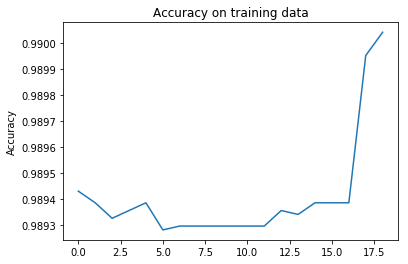

In [116]:
plt.plot(accuracy)
plt.title('Accuracy on training data')
plt.ylabel('Accuracy')

In [117]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_test, test_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9896987019173514
2 0.9895200666904846
3 0.9894605216148624
4 0.9895200666904846


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.9895200666904846


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.989579611766107


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.9896391568417292


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.9901750625223295


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.9910086935810408


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.9912468738835298

19
0.9912468738835298


Text(0, 0.5, 'Accuracy')

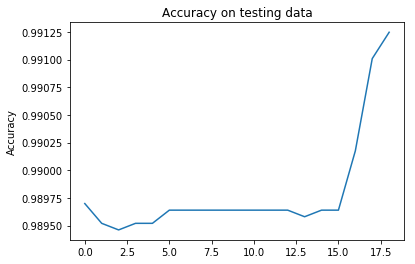

In [118]:
plt.plot(accuracy)
plt.title('Accuracy on testing data')
plt.ylabel('Accuracy')

In [119]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_oot, oot_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.9855958799388428
2 0.9855958799388428
3 0.9855154099943672


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.9854349400498914
5 0.9856763498833185


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.8825943510098978


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.8803411925645771


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.8805826023980043


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.879134143397441


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.8789732035084896


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.8792950832863925


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.8771223947855475


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.872374668061479


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.8706847992274885


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.8908022853464231


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.8665003621147501


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.9586384485394706


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.9648346342641023


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.9686971915989377

19
0.9856763498833185


Text(0, 0.5, 'Accuracy')

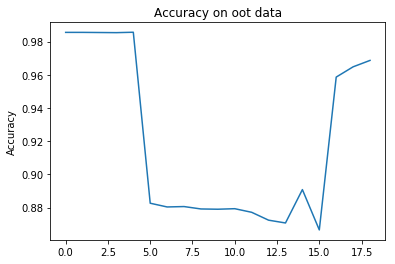

In [120]:
plt.plot(accuracy)
plt.title('Accuracy on oot data')
plt.ylabel('Accuracy')

# Feature Selection based on ROC_AUC

In [121]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub)
    score = roc_auc_score(train_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5013768156388502
2 0.5013542487279594


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3 0.5013241595134383
4 0.5020388953955692


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.5020539400028298


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.5034006664271587


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.5041078800056595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.5118345732437555


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.5104276683903842


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.5118496178510159


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.5125493091258865


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.5447351077699267


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.573708297577565


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.5758525052239579

19
0.5758525052239579


Text(0, 0.5, 'ROC_AUC_Score')

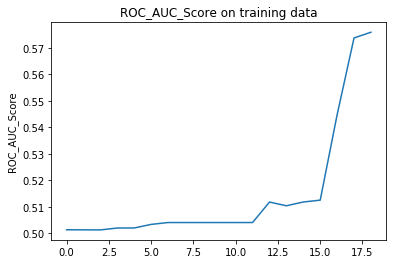

In [122]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on training data')
plt.ylabel('ROC_AUC_Score')

In [123]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_test)
    score = roc_auc_score(test_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5
2 0.4999097527224595
3 0.49987967029661273
4 0.4999097527224595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


5 0.4999097527224595


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.5056900995432688


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.5085501905278266


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.505660017117422


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.5085501905278266


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.5085501905278266


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.5631626610670463


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.6007649978281532


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.6094656004852138

19
0.6094656004852138


Text(0, 0.5, 'ROC_AUC_Score')

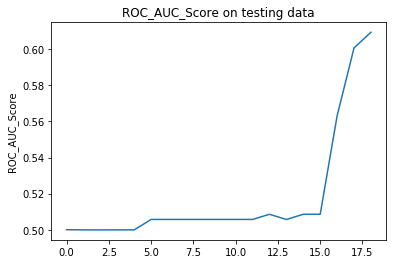

In [124]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on testing data')
plt.ylabel('ROC_AUC_Score')

In [125]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_oot)
    score = roc_auc_score(oot_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1 0.5
2 0.5
3 0.4999591770084912


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


4 0.49991835401698237
5 0.5110507153830154


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6 0.7119839882648724


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7 0.7025835252089955


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8 0.7027059941835219


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


9 0.7019711803363632


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


10 0.7018895343533456


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


11 0.7020528263193808


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


12 0.7009506055486427


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13 0.7040469952453758


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14 0.7086946586194439


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


15 0.6803657831263753


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


16 0.6873045513758489


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


17 0.5000866633339294


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


18 0.49772508748435496


/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


19 0.502437064174655

19
0.7119839882648724


Text(0, 0.5, 'ROC_AUC_Score')

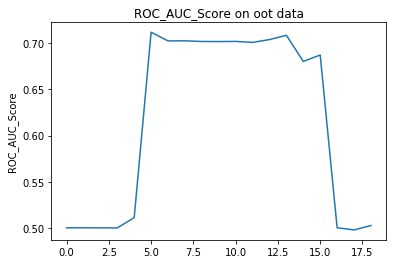

In [126]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on oot data')
plt.ylabel('ROC_AUC_Score')

Sadly, the accuracy (optimal # of variables = 19) and ROC_AUC_score (optimal # of variables = 9) seem pretty weird on oot data. I didn't figure out whether anything is wrong yet. 

# Feature Selection based on FDR

In [127]:
def multipltrun(a=10,v=18):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdict={"train":[],"test":[],"oot":[]}
    
    for i in range(a):        
        #split training and testing
        train, test = train_test_split(data, test_size=0.2,random_state=i)
        
        # split lables and features and t
        train_lab = train["Fraud"]
        train_fea = train.iloc[:,1:v+1]

        test_lab = test["Fraud"]
        test_fea = test.iloc[:,1:v+1]

        oot_lab=oot_df["Fraud"]
        oot_fea=oot_df.iloc[:,1:v+1]

        #define and fit model

        clf = LogisticRegression()
        clf.fit(train_fea, train_lab)
    
        #calculate FDR
        for sets in ["train","test","oot"]:
            fea=vars()[sets+'_fea'] 
            lab=vars()[sets+'_lab']
            prob=pd.DataFrame(clf.predict_proba(fea)) #modify based on your model
            result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
            topRows=int(round(len(result)*0.03))
            top3per=result.sort_values(by=1,ascending=False).head(topRows)
            FDR=sum(top3per.loc[:,'Fraud'])/sum(result.loc[:,'Fraud'])
            FDRdict[sets].append(FDR)
    
    #convert into dataframe
    FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
    FDR_df.loc['mean']=FDR_df.mean()
    
    return FDR_df

In [128]:
multipltrun()

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

,train,test,oot
0,0.553041,0.618497,0.273743
1,0.549858,0.640449,0.256983
2,0.556391,0.581395,0.273743
3,0.572263,0.574359,0.279330
4,0.561453,0.640244,0.268156
5,0.561605,0.571429,0.273743
6,0.568182,0.602273,0.268156
7,0.570442,0.519231,0.251397
8,0.568768,0.593407,0.279330
9,0.583217,0.557576,0.273743


In [129]:
multipltrun(v=20)

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

,train,test,oot
0,0.545969,0.618497,0.296089
1,0.547009,0.651685,0.307263
2,0.557895,0.586047,0.318436
3,0.569343,0.589744,0.324022
4,0.562849,0.640244,0.301676
5,0.554441,0.582418,0.324022
6,0.561080,0.602273,0.312849
7,0.570442,0.519231,0.279330
8,0.567335,0.582418,0.318436
9,0.576224,0.557576,0.307263


In [131]:
multipltrun(v=16)

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

,train,test,oot
0,0.352192,0.427746,0.128492
1,0.360399,0.404494,0.134078
2,0.353383,0.381395,0.128492
3,0.357664,0.405128,0.134078
4,0.360335,0.390244,0.139665
5,0.358166,0.401099,0.128492
6,0.357955,0.397727,0.122905
7,0.375691,0.352564,0.122905
8,0.368195,0.362637,0.128492
9,0.367832,0.321212,0.139665


In [130]:
def multipltrun_2(a=10,v=16):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdf_v=pd.DataFrame({"train":[],"test":[],"oot":[]})
    
    for j in range(1,v+1):
        FDRdict={"train":[],"test":[],"oot":[]}
        
        for i in range(a):
        #split training and testing
            train, test = train_test_split(data, test_size=0.2,random_state=i)
        
            # split lables and features and t
            train_lab = train["Fraud"]
            train_fea = train.iloc[:,1:j+1]

            test_lab = test["Fraud"]
            test_fea = test.iloc[:,1:j+1]

            oot_lab=oot_df["Fraud"]
            oot_fea=oot_df.iloc[:,1:j+1]

            #define and fit model

            clf = LogisticRegression()
            clf.fit(train_fea, train_lab)

            #calculate FDR
            for sets in ["train","test","oot"]:
                fea=vars()[sets+'_fea'] 
                lab=vars()[sets+'_lab']
                prob=pd.DataFrame(clf.predict_proba(fea)) 
                result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
                topRows=int(round(len(result)*0.03))
                top3per=result.sort_values(by=1,ascending=False).head(topRows)
                FDR=sum(top3per.loc[:,'Fraud'])/sum(result.loc[:,'Fraud'])
                FDRdict[sets].append(FDR)
    
    #convert into dataframe
        FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
        # FDRdf_v.append(FDR_df.mean(),ignore_index=True)
    
        FDRdf_v.loc[j+1]=FDR_df.mean()
        
    return FDRdf_v

In [105]:
multipltrun_2()

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

,train,test,oot
2,0.081355,0.081561,1.000000
3,0.099762,0.100310,0.758101
4,0.114629,0.116187,0.515084
5,0.118512,0.119396,0.102793
6,0.174997,0.183521,0.059777
7,0.366329,0.371566,0.164804
8,0.369623,0.375906,0.177095
9,0.369341,0.375328,0.177654
10,0.369774,0.374121,0.168715
11,0.355768,0.361196,0.160894


In [106]:
multipltrun_df=multipltrun_2()

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kailinghung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

## According to the chart above, the optimal FDR for oot data is 0.375419, corresponding to 13 variables.

Text(0, 0.5, 'FDR')

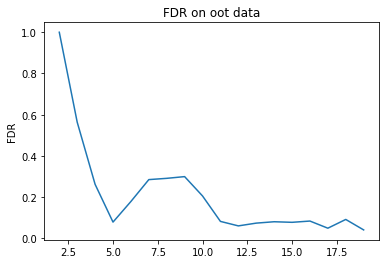

In [42]:
plt.plot(multipltrun_df['oot'])
plt.title('FDR on oot data')
plt.ylabel('FDR')

Conclusion: optimal # of variables is 13, the corresponding FDR is 0.375419.